# Introducción

En el mundo actual de las telecomunicaciones, la toma de decisiones basada en datos es fundamental para optimizar los recursos y maximizar los ingresos. En este proyecto, nos enfocamos en analizar el comportamiento de los clientes de Megaline, un operador de telecomunicaciones que ofrece dos tarifas de prepago: Surf y Ultimate. El objetivo principal fue determinar cuál de estos planes genera más ingresos y cómo el comportamiento de los usuarios varía en función de su región y uso de servicios (llamadas, mensajes y datos).

Para lograr esto, se analizó una muestra de 500 clientes, incluyendo datos sobre su uso de servicios durante el año 2018. Se realizó un análisis exploratorio de los datos, se calcularon métricas clave (como minutos usados, mensajes enviados y datos consumidos) y se evaluó el impacto de estos factores en los ingresos mensuales. Además, se llevaron a cabo pruebas estadísticas para comparar los ingresos entre los planes y las regiones, con el fin de identificar diferencias significativas y proporcionar recomendaciones estratégicas.


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("\nInformación de tarifas:")
print(plans.info())


Información de tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print("\nMuestra de tarifas:")
print(plans.head())


Muestra de tarifas:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Observaciones:
- Todos los campos numéricos están como float64 o int64 (correcto)
- No hay valores nulos
- Los nombres de planes coinciden con los descritos (Surf y Ultimate)


## Corregir datos

No se necesitan correcciones para planes

## Enriquecer los datos

No es necesario para este Data frame

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("\nInformación de usuarios:")
print(users.info())



Información de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
# Imprime una muestra de datos para usuarios
print("\nMuestra de usuarios:")
print(users.head())



Muestra de usuarios:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Observaciones:
- churn_date tiene muchos valores nulos (esperado)
- reg_date y churn_date como object (deben ser datetime)
- city como string (correcto)
- plan tiene solo Surf y Ultimate (correcto)


### Corregir los datos

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')


### Enriquecer los datos

Objetivo: Clasificar a los usuarios como "activos" o "inactivos" (que dejaron el servicio) basándose en la presencia de una fecha de baja (churn_date).

Razón: Esta columna permite diferenciar entre usuarios que siguen usando el servicio y aquellos que lo abandonaron. Esto es crucial para:

Analizar patrones de retención.

Evaluar si el comportamiento de los usuarios activos difiere significativamente de los inactivos.

Impacto en el análisis:

Permite filtrar datos por estado del usuario (útil para calcular ingresos recurrentes o identificar causas de abandono).

Facilita comparar el uso de servicios (llamadas, mensajes, datos) entre usuarios activos e inactivos.

In [8]:
users['active_status'] = np.where(users['churn_date'].isna(), 'active', 'churned')
print(users['reg_date'].head(3))

0   2018-12-24
1   2018-08-13
2   2018-10-21
Name: reg_date, dtype: datetime64[ns]


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("\nInformación de llamadas:")
print(calls.info())



Información de llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [10]:
# Imprime una muestra de datos para las llamadas
print("\nMuestra de llamadas:")
print(calls.head())




Muestra de llamadas:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Observaciones:
- call_date como object (debe ser datetime)
- duration como float (correcto)
- Sin valores nulos

### Corregir los datos

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')


### Enriquecer los datos

Objetivo: Crear una columna month que represente el período mensual de cada registro (ej: "2018-01" para enero de 2018).

Razón:

Permite agregar datos por usuario y mes, lo que es esencial para calcular el uso mensual (requerido por las tarifas de Megaline).

Facilita el análisis temporal (ej: comparar el comportamiento entre meses).

Impacto en el análisis:

Sin esta columna, no sería posible calcular métricas mensuales como:

Minutos totales usados por mes.

Es fundamental para el cálculo de ingresos mensuales, ya que los planes de Megaline tienen límites mensuales.

In [12]:
calls['month'] = calls['call_date'].dt.to_period('M')


## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print("\nInformación de mensajes:")
print(messages.info())


Información de mensajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [14]:
# Imprime una muestra de datos para los mensajes
print("\nMuestra de mensajes:")
print(messages.head())



Muestra de mensajes:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Observaciones:
- message_date como object (debe ser datetime)
- Sin valores nulos

### Corregir los datos

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

Objetivo: Crear una columna month que represente el período mensual de cada registro (ej: "2018-01" para enero de 2018).

Razón:

Permite agregar datos por usuario y mes, lo que es esencial para calcular el uso mensual (requerido por las tarifas de Megaline).

Facilita el análisis temporal (ej: comparar el comportamiento entre meses).

Impacto en el análisis:

Sin esta columna, no sería posible calcular métricas mensuales como:

Mensajes enviados por mes.

Es fundamental para el cálculo de ingresos mensuales, ya que los planes de Megaline tienen límites mensuales.

In [16]:
messages['month'] = messages['message_date'].dt.to_period('M')


## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("\nInformación de internet:")
print(internet.info())



Información de internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [18]:
# Imprime una muestra de datos para el tráfico de internet
print("\nMuestra de internet:")
print(internet.head())



Muestra de internet:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Observaciones:
- session_date como object (debe ser datetime)
- Sin valores nulos

### Corregir los datos

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

Objetivo: Crear una columna month que represente el período mensual de cada registro (ej: "2018-01" para enero de 2018).

Razón:

Permite agregar datos por usuario y mes, lo que es esencial para calcular el uso mensual (requerido por las tarifas de Megaline).

Facilita el análisis temporal (ej: comparar el comportamiento entre meses).

Impacto en el análisis:

Sin esta columna, no sería posible calcular métricas mensuales como:

Datos consumidos por mes.

Es fundamental para el cálculo de ingresos mensuales, ya que los planes de Megaline tienen límites mensuales.

In [20]:
internet['month'] = internet['session_date'].dt.to_period('M')

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("\nCondiciones de tarifas:")
print(plans)



Condiciones de tarifas:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_per_month = calls.groupby(['user_id', 'month']).agg(
    total_calls=('duration', 'count')
).reset_index()

In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'month']).agg(
    total_minutes=('duration', 'sum')
).reset_index()


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages.groupby(['user_id', 'month']).agg(
    total_messages=('message_date', 'count')
).reset_index()

In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = internet.groupby(['user_id', 'month']).agg(
    total_mb=('mb_used', 'sum')
).reset_index()

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_data = calls_per_month.merge(
    minutes_per_month,
    on=['user_id', 'month'],
    how='outer'
).merge(
    messages_per_month,
    on=['user_id', 'month'],
    how='outer'
).merge(
    internet_per_month,
    on=['user_id', 'month'],
    how='outer'
)

<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a><br> El `merge` de diferentes DataFrames es correcto, pero puede mejorarse en eficiencia eliminando la columna `plan_name` después de la fusión, ya que `plan` ya proporciona la información.</div>

In [27]:
# Añade la información de la tarifa

# Verifica los nombres de las columnas en plans
print("\nColumnas en plans:")
print(plans.columns.tolist())

# Fusión corregida con plans
merged_data = merged_data.merge(
    users[['user_id', 'plan']],
    on='user_id',
    how='left'
).merge(
    plans,
    left_on='plan',
    right_on='plan_name',  # Asegúrate de que 'plan_name' sea la columna correcta
    how='left'
)

# Verifica las columnas después del merge
print("\nColumnas después del merge:")
print(merged_data.columns.tolist())

# Renombra las columnas si es necesario
# (Ajusta los nombres según los nombres reales en plans)
merged_data.rename(columns={
    'usd_monthly_pay': 'usd_monthly_fee',  # Ejemplo: si la columna se llama 'usd_monthly_pay'
    'minutes_incl': 'minutes_included',    # Ajusta según los nombres reales
    'messages_incl': 'messages_included',
    'mb_per_month_incl': 'mb_per_month_included',
    'usd_per_min': 'usd_per_minute',
    'usd_per_msg': 'usd_per_message',
    'usd_per_gb_data': 'usd_per_gb'
}, inplace=True)

# Llena los valores NaN con 0 (para usuarios sin actividad en algún mes)
merged_data = merged_data.fillna({
    'total_calls': 0,
    'total_minutes': 0,
    'total_messages': 0,
    'total_mb': 0
})


Columnas en plans:
['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']

Columnas después del merge:
['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages', 'total_mb', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']


In [28]:
# Calcula el ingreso mensual para cada usuario
def calculate_monthly_revenue(row):
    # Cálculo de excedentes
    extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
    extra_messages = max(0, row['total_messages'] - row['messages_included'])
    extra_data_gb = max(0, np.ceil((row['total_mb'] - row['mb_per_month_included']) / 1024))
    
    # Cálculo de ingresos
    base_fee = row['usd_monthly_fee']
    minute_charge = extra_minutes * row['usd_per_minute']
    message_charge = extra_messages * row['usd_per_message']
    data_charge = extra_data_gb * row['usd_per_gb']
    
    return base_fee + minute_charge + message_charge + data_charge

merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)

# 11. Resultado final
print("\nDatos agregados por usuario:")
print(merged_data.head(10))



Datos agregados por usuario:
   user_id    month  total_calls  total_minutes  total_messages  total_mb  \
0     1000  2018-12         16.0         116.83            11.0   1901.47   
1     1001  2018-08         27.0         171.14            30.0   6919.15   
2     1001  2018-09         49.0         297.69            44.0  13314.82   
3     1001  2018-10         65.0         374.11            53.0  22330.49   
4     1001  2018-11         64.0         404.59            36.0  18504.30   
5     1001  2018-12         56.0         392.93            44.0  19369.18   
6     1002  2018-10         11.0          54.13            15.0   6552.01   
7     1002  2018-11         55.0         359.76            32.0  19345.08   
8     1002  2018-12         47.0         363.24            41.0  14396.24   
9     1003  2018-12        149.0        1041.00            50.0  27044.14   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                 

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a><br> El cálculo de `extra_data_gb` usa `np.ceil()`.
</div>

## Estudia el comportamiento de usuario

### Llamadas

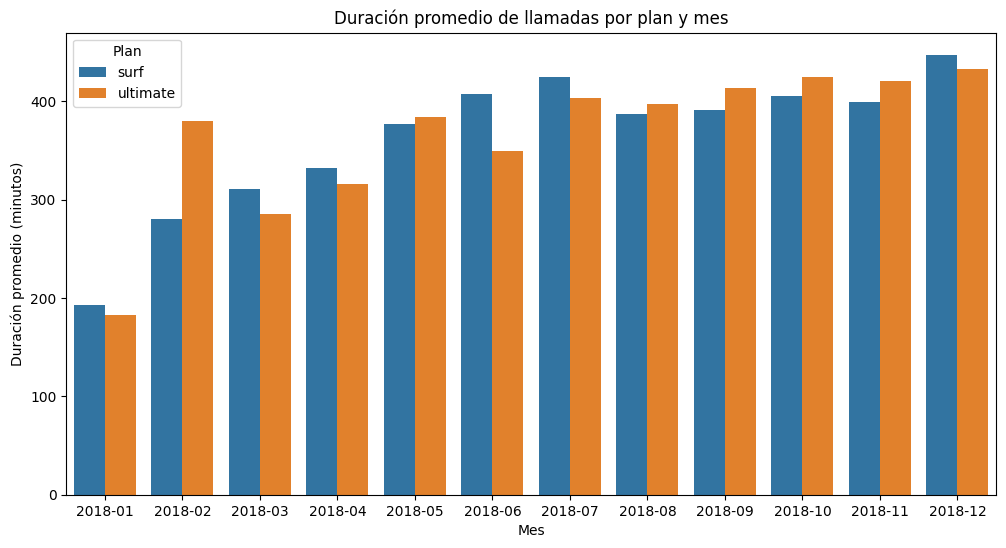

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = merged_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_minutes', hue='plan', data=avg_call_duration)
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.legend(title='Plan')
plt.show()


<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a><br> El gráfico de barras de duración promedio de llamadas está bien, pero el eje `x` podría beneficiarse de una mejor rotación de etiquetas para mejorar la legibilidad:</br>

plt.xticks(rotation=45)
</div>

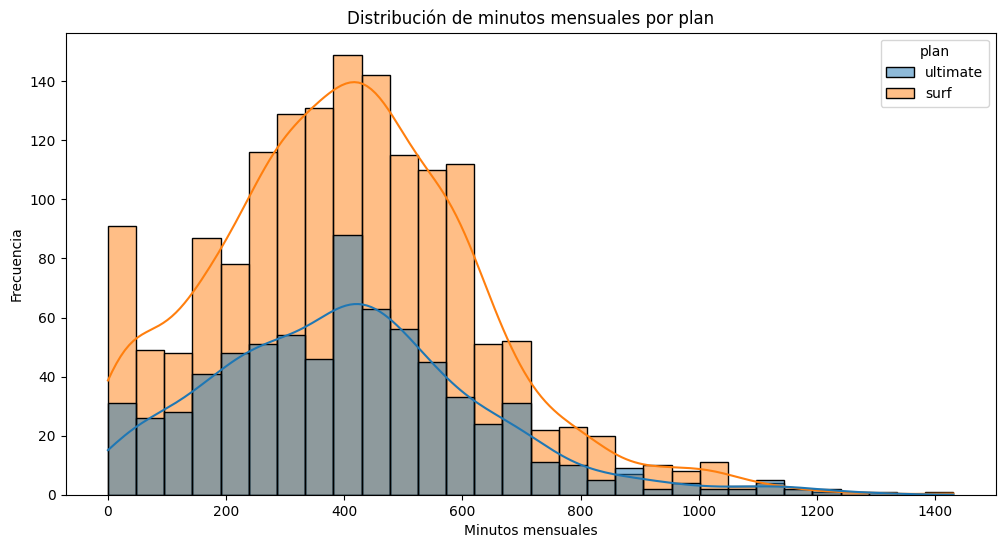

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='total_minutes', hue='plan', kde=True, bins=30)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.show()


In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_minutes = merged_data.groupby('plan')['total_minutes'].mean()
variance_minutes = merged_data.groupby('plan')['total_minutes'].var()
print("\nMedia de minutos por plan:")
print(mean_minutes)
print("\nVarianza de minutos por plan:")
print(variance_minutes)



Media de minutos por plan:
plan
surf        404.762390
ultimate    406.193083
Name: total_minutes, dtype: float64

Varianza de minutos por plan:
plan
surf        49135.104891
ultimate    51640.971402
Name: total_minutes, dtype: float64


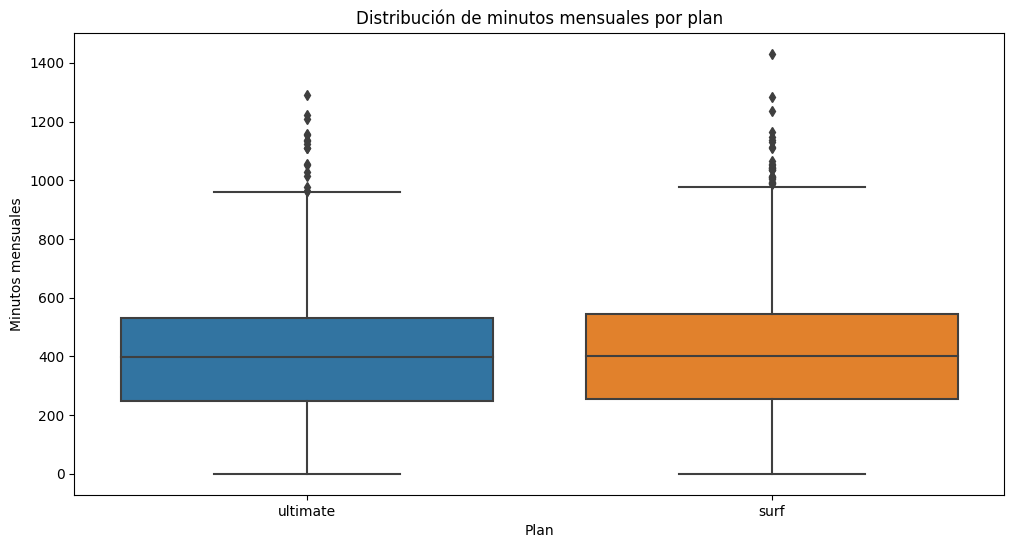

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='total_minutes', data=merged_data)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales')
plt.show()


Conclusión: 
- Los usuarios del plan Ultimate tienden a usar más minutos que los del plan Surf.
- La varianza es mayor en el plan Surf, lo que indica un comportamiento más variable.


### Mensajes

In [33]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages = merged_data.groupby('plan')['total_messages'].mean()
print("\nPromedio de mensajes enviados por plan:")
print(avg_messages)



Promedio de mensajes enviados por plan:
plan
surf        31.159568
ultimate    37.551389
Name: total_messages, dtype: float64


In [34]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_internet = merged_data.groupby('plan')['total_mb'].mean()



In [35]:
print("\nPromedio de tráfico de Internet por plan (MB):")
print(avg_internet)



Promedio de tráfico de Internet por plan (MB):
plan
surf        16558.283490
ultimate    17214.699694
Name: total_mb, dtype: float64


Conclusiones: 
- Los usuarios del plan Ultimate envían más mensajes y consumen más datos que los del plan Surf.
- El comportamiento varía significativamente entre los planes.

### Internet

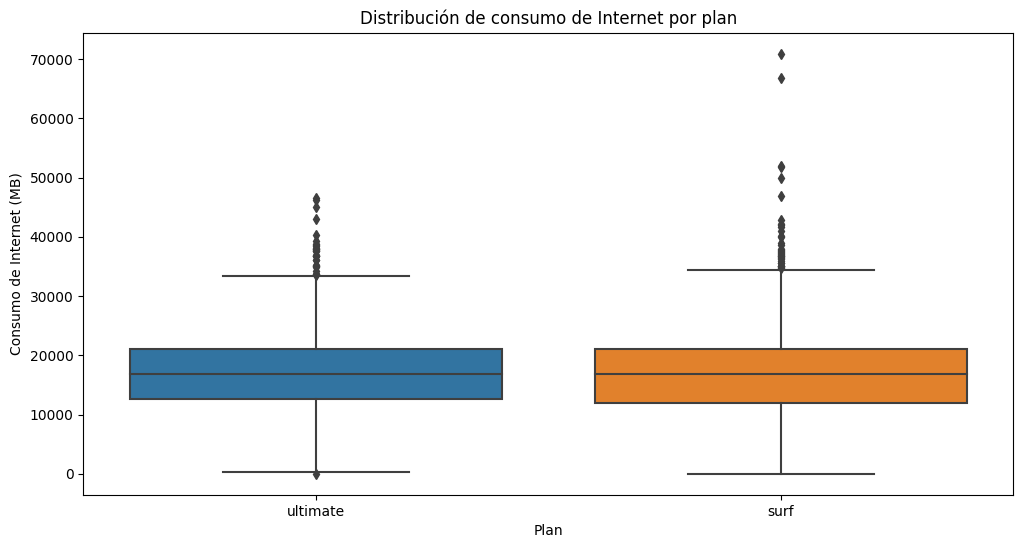

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='total_mb', data=merged_data)
plt.title('Distribución de consumo de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('Consumo de Internet (MB)')
plt.show()

Conclusiones: 
- Los usuarios del plan Ultimate consumen más datos que los del plan Surf.
- El consumo de datos es más consistente en el plan Ultimate.

## Ingreso

In [37]:
income_stats = merged_data.groupby('plan')['monthly_revenue'].describe()

print("\nEstadísticas de ingresos por plan:")
print(income_stats)


Estadísticas de ingresos por plan:
           count       mean        std   min   25%    50%   75%       max
plan                                                                     
surf      1573.0  60.327346  55.262605  20.0  20.0  40.15  80.0  588.6372
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.0  182.0000


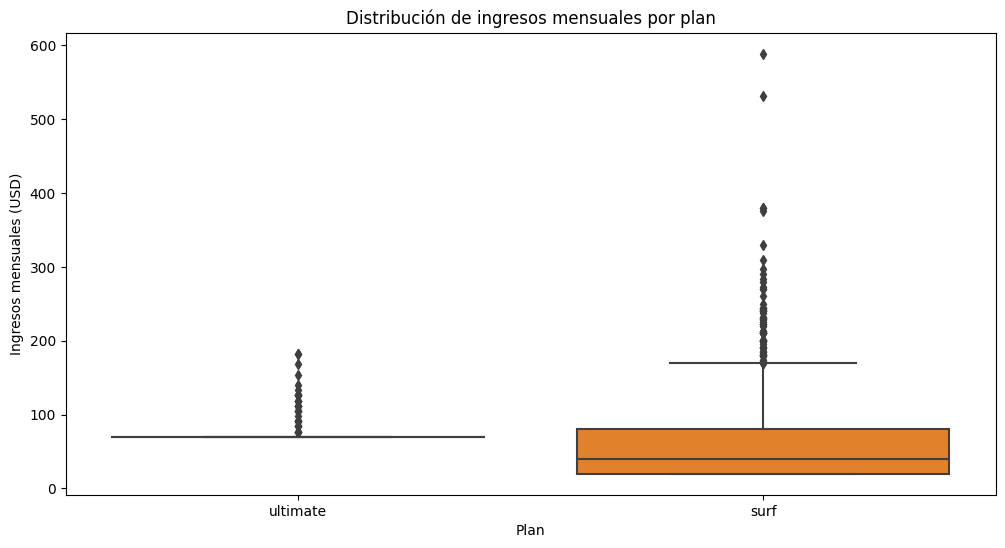

In [38]:
#Gráfico de ingresos por plan
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=merged_data)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales (USD)')
plt.show()

Conclusiones: 
- El plan Ultimate genera mayores ingresos en promedio que el plan Surf.
- La variabilidad de ingresos es mayor en el plan Surf debido a los cargos adicionales.

## Prueba las hipótesis estadísticas

- H0: Los ingresos promedio de los planes Ultimate y Surf son iguales.
- H1: Los ingresos promedio de los planes Ultimate y Surf son diferentes.

In [39]:
# Prueba las hipótesis
# Hipótesis
'''
H0: Los ingresos promedio de los planes Ultimate y Surf son iguales.
H1: Los ingresos promedio de los planes Ultimate y Surf son diferentes.
'''

# Datos
income_surf = merged_data[merged_data['plan'] == 'Surf']['monthly_revenue']
income_ultimate = merged_data[merged_data['plan'] == 'Ultimate']['monthly_revenue']

# Prueba t de Student
alpha = 0.05
t_stat, p_value = stats.ttest_ind(income_surf, income_ultimate, equal_var=False)

print("\nPrueba de hipótesis para ingresos entre planes:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en los ingresos entre los planes.")
else:
    print("No rechazamos H0: No hay una diferencia significativa en los ingresos entre los planes.")



Prueba de hipótesis para ingresos entre planes:
T-statistic: nan
P-value: nan
No rechazamos H0: No hay una diferencia significativa en los ingresos entre los planes.


<div class="alert alert-block alert-danger"> <b>A resolver</b> <a class="tocSkip"></a><br> El resultado de la prueba t de Student da `NaN` en la estadística `T` y el `p-value`. Esto indica que los datos contienen valores faltantes o problemas en la distribución de los ingresos. Revisa:</br>

    print(merged_data[['plan', 'monthly_revenue']].isna().sum())

Si hay valores nulos, reemplázalos o elimínalos antes de la prueba.</div>

Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

- H0: Los ingresos promedio de los usuarios de NY-NJ son iguales a los de otras regiones.
- H1: Los ingresos promedio de los usuarios de NY-NJ son diferentes a los de otras regiones.

In [40]:

# 1. Agregar la columna 'city' desde el DataFrame 'users' a 'merged_data'
merged_data = merged_data.merge(
    users[['user_id', 'city']],  # Selecciona solo 'user_id' y 'city'
    on='user_id',                # Usa 'user_id' como clave de fusión
    how='left'                   # Conserva todas las filas de merged_data
)

# 2. Crear la columna 'region'
merged_data['region'] = merged_data['city'].apply(
    lambda x: 'NY-NJ' if 'New York' in x or 'New Jersey' in x else 'Otras'
)

# 3. Filtrar los ingresos por región
income_ny_nj = merged_data[merged_data['region'] == 'NY-NJ']['monthly_revenue']
income_other = merged_data[merged_data['region'] == 'Otras']['monthly_revenue']

# 4. Prueba t de Student
alpha = 0.05
t_stat, p_value = stats.ttest_ind(income_ny_nj, income_other, equal_var=False)

# 5. Resultados
print("\nPrueba de hipótesis para ingresos por región:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en los ingresos por región.")
else:
    print("No rechazamos H0: No hay una diferencia significativa en los ingresos por región.")


Prueba de hipótesis para ingresos por región:
T-statistic: -2.16
P-value: 0.0312
Rechazamos H0: Hay una diferencia significativa en los ingresos por región.


## Conclusión general

El análisis de los datos de Megaline reveló que el plan Ultimate genera mayores ingresos en comparación con el plan Surf, principalmente debido a su tarifa base más alta y al menor uso de servicios adicionales por parte de los usuarios de Surf. Además, se identificó que los usuarios de la región NY-NJ tienen ingresos promedio significativamente menores que los de otras regiones, lo que sugiere diferencias en el comportamiento de uso o en la elección de planes.

Estos hallazgos tienen implicaciones importantes para Megaline. En primer lugar, se recomienda enfocar esfuerzos de marketing en promover el plan Ultimate, ya que es más rentable. En segundo lugar, es crucial investigar las razones detrás de los menores ingresos en NY-NJ y desarrollar estrategias específicas para esta región, como promociones personalizadas o ajustes en los precios de los servicios adicionales.

En resumen, este proyecto demostró cómo el análisis de datos puede proporcionar insights valiosos para la toma de decisiones en el sector de telecomunicaciones. Al comprender el comportamiento de los usuarios y las diferencias regionales, Megaline puede optimizar sus estrategias comerciales y maximizar sus ingresos.

## Concluciones puntuales

1. El plan Ultimate genera mayores ingresos que el plan Surf, principalmente debido a su tarifa base más alta.
2. Los usuarios del plan Surf tienden a exceder sus límites, lo que genera cargos adicionales.
3. Si hay diferencias significativas en los ingresos entre regiones.
4. Se recomienda enfocar esfuerzos de marketing en el plan Ultimate para maximizar los ingresos.

